# 단순 회귀 분석 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 로딩 - UCI 자동차 연비 데이터세트
df = pd.read_csv('data/auto-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# 열 이름 지정 
df.columns = ['mpg', 'cylinders', 'dispacement', 'horsepower', 'weight', 
             'acceleration', 'model year', 'origin', 'name']
df.head()

,mpg,cylinders,dispacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
# 데이터 탐색
df.describe()

,mpg,cylinders,dispacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   dispacement   398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
# 데이터 전처리
# horsepower가 object이므로 문자열 찾아서 삭제(대체)하고 숫자형으로 변경
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [7]:
df.horsepower.replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df.horsepower = df.horsepower.astype('float64')

df.describe()

,mpg,cylinders,dispacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df.shape

(392, 9)

In [9]:
# 분석에 필요한 속성 (설명변수) : 실린더, 출력, 중량
# 예측 목표 속성 (종속변수) : 연비

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


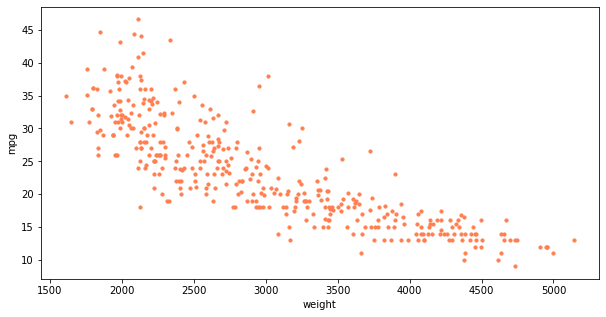

In [11]:
# 연비와 중량 간의 선형관계를 그래프로 확인
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

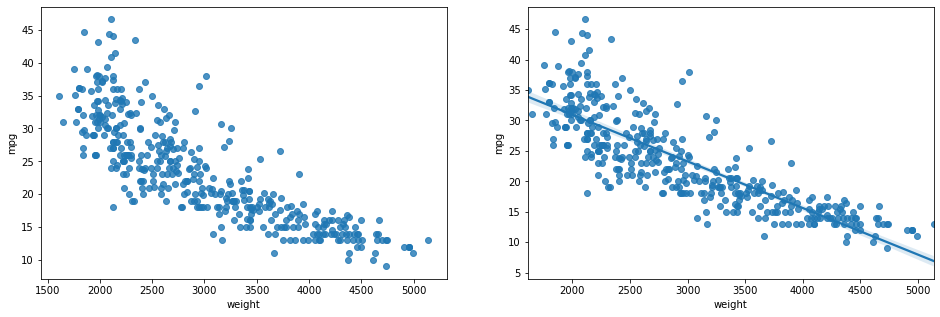

In [15]:
# seaborn 으로 산점도 그리기
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1, fit_reg=False)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=True)
plt.show()
plt.close()

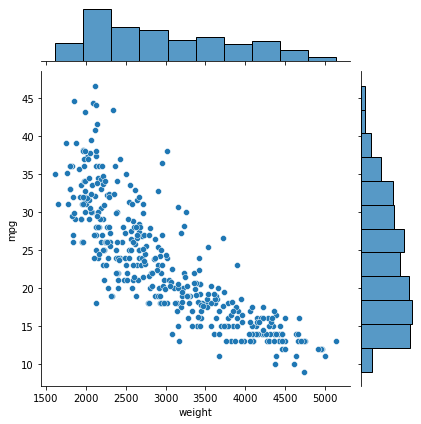

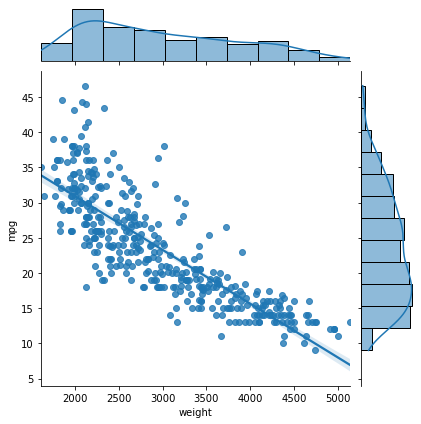

In [16]:
# 조인트 그래프 - 산점도, 히스토그램 
sns.jointplot(x='weight', y='mpg', data=ndf, ax=ax1, )
sns.jointplot(x='weight', y='mpg', data=ndf, ax=ax2, kind='reg')
plt.show()
plt.close()

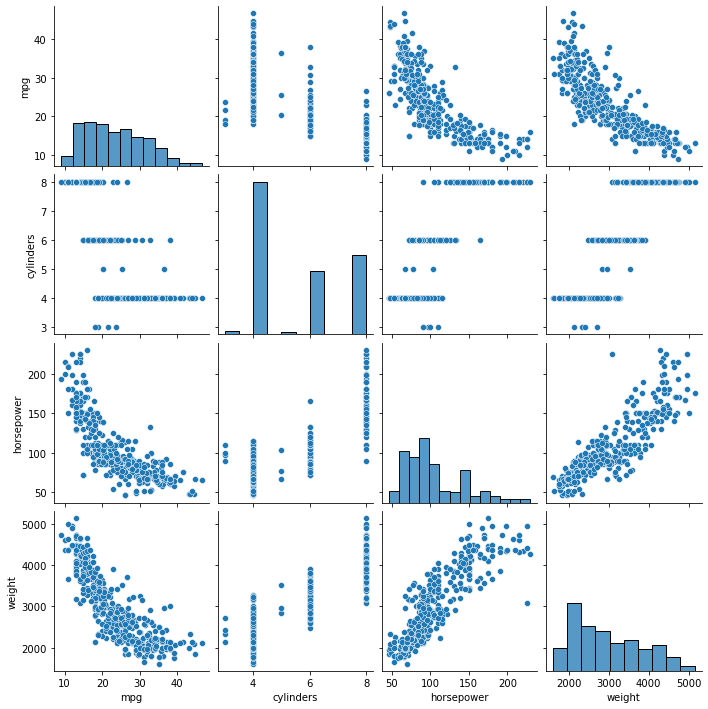

In [17]:
# 변수 간의 모든 경우의 수를 그리기
sns.pairplot(ndf)
plt.show()
plt.close()

In [18]:
# 속성 선택
X = ndf[['weight']]
y = ndf['mpg']

# 훈련 / 테스트 데이터 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [20]:
# 선형회귀분석 모형으로 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [21]:
# 결정계수 확인
r_score = lr.score(X_test, y_test)
r_score     # 결정계수 값이 클수록 모형의 예측 능력이 좋다고 평가

0.6822458558299325

In [22]:
# 회귀식 (기울기, 절편)
print(lr.coef_, lr.intercept_)

[-0.00775343] 46.710366257280086


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


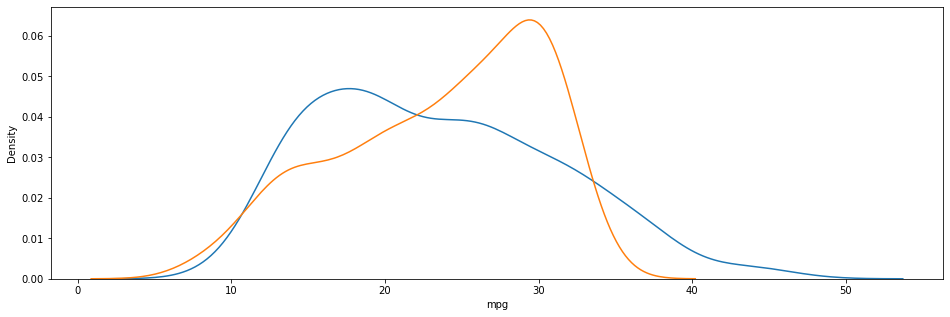

In [26]:
# 예측한 값과 실제 값을 비교
y_pred = lr.predict(X)

plt.figure(figsize=(16, 5))
ax1 = sns.distplot(y, hist=False)
ax2 = sns.distplot(y_pred, hist=False )
plt.show()
plt.close()

# 다항 회귀 분석

In [ ]:
'''
# 독립변수 X와 종속변수 y 사이의 관계를 직선보다 곡선으로 설명하는 것이 더 적합하다고 판단 될 때
# 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
ex) y = aX² + bx + c
# 다항회귀분석 모형은 학습을 통해 a, b, c 계수를 찾아서 모형을 완성
'''

In [27]:
# 데이터 로딩 - UCI 자동차 연비 데이터세트
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름 지정 
df.columns = ['mpg', 'cylinders', 'dispacement', 'horsepower', 'weight', 
             'acceleration', 'model year', 'origin', 'name']

# 데이터 전처리
df.horsepower.replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df.horsepower = df.horsepower.astype('float64')

df.describe()

# 분석에 필요한 속성 (설명변수) : 실린더, 출력, 중량
# 예측 목표 속성 (종속변수) : 연비

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# 속성 선택
X = ndf[['weight']]
y = ndf['mpg']

# 훈련 / 테스트 데이터 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(X_train.shape, X_test.shape)

(274, 1) (118, 1)


In [28]:
# 비선형회귀분석 모형 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [29]:
# 다항식 변환
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)

print('원 데이터 : ', X_train.shape)
print('2차항 변환 데이터 : ', X_train_poly.shape)

원 데이터 :  (274, 1)
2차항 변환 데이터 :  (274, 3)


In [31]:
# 모델 학습
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [33]:
# 결정계수로 체크
X_test_poly = poly.fit_transform(X_test)
r_score = lr.score(X_test_poly, y_test)
print(r_score)

0.7087009262975685


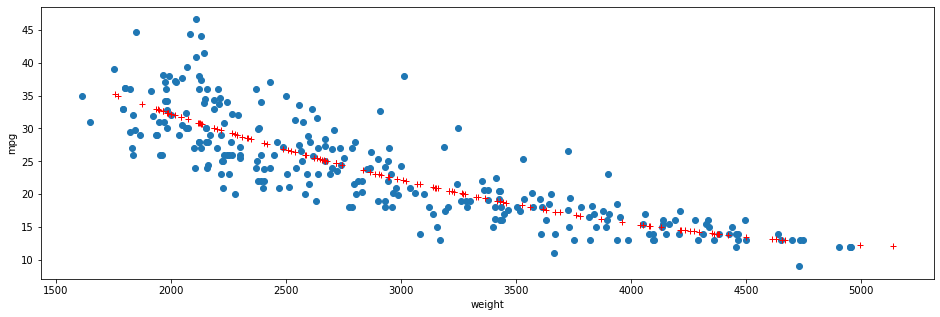

In [36]:
# 산점도 체크
y_pred_test = lr.predict(X_test_poly)

fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='train data')
ax.plot(X_test, y_pred_test, 'r+', label='predicted values')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


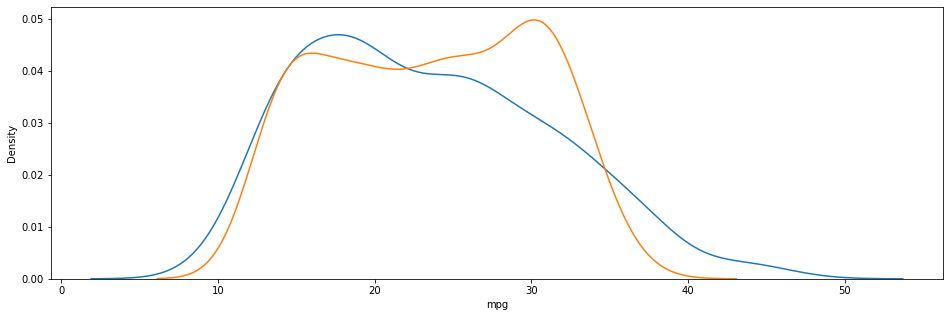

In [37]:
# 전체 데이터를 입력하여 예측값과 실제 값 비교 그래프
X_poly = poly.fit_transform(X)
y_pred = lr.predict(X_poly)

plt.figure(figsize=(16, 5))
ax1 = sns.distplot(y, hist=False)
ax2 = sns.distplot(y_pred, hist=False, ax=ax1)
plt.show()
plt.close()

# 다중 회귀 분석

In [ ]:
'''
# 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형관계를 갖는 경우
  다중 회귀 분석(Multivariable  Regression)을 사용함
'''

In [39]:
# 데이터 로딩 - UCI 자동차 연비 데이터세트
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름 지정 
df.columns = ['mpg', 'cylinders', 'dispacement', 'horsepower', 'weight', 
             'acceleration', 'model year', 'origin', 'name']

# 데이터 전처리
df.horsepower.replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df.horsepower = df.horsepower.astype('float64')

df.describe()

# 분석에 필요한 속성 (설명변수) : 실린더, 출력, 중량
# 예측 목표 속성 (종속변수) : 연비

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# 속성 선택
X = ndf[['weight', 'cylinders', 'horsepower']]
y = ndf['mpg']

# 훈련 / 테스트 데이터 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(X_train.shape, X_test.shape)

(274, 3) (118, 3)


In [41]:
# 다중회귀분석모형 - LinearRegression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

r_score = lr.score(X_test, y_test)
r_score

0.6939048496695586

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


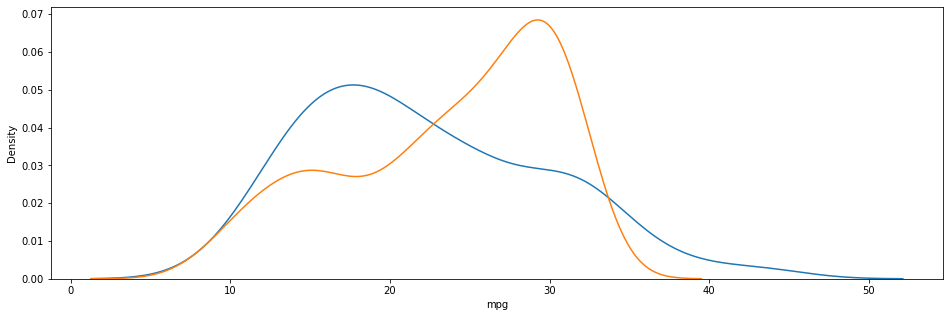

In [42]:
y_pred = lr.predict(X)

plt.figure(figsize=(16, 5))
ax1 = sns.distplot(y_test, hist=False)
ax2 = sns.distplot(y_pred, hist=False, ax=ax1)
plt.show()
plt.close()

# 로지스틱 회귀

In [ ]:
'''
# 어떤 회귀 알고리즘은 분류에도 사용 가능 (반대도 있음)
# 로지스틱 회귀 알고리즘은 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용
  ex) 스팸메일을 체크
  - 이 이메일이 스팸일 확률은 얼마인가?
    추정확률이 50%가 넘으면 레이블 1로 인식하는 양성 클래스 
    추정확률이 50%가 넘지 않으면 레이블 0으로 인식하는 음성 클래스
    => 결과적으로 이진 분류기 효과
'''

In [43]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [44]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [45]:
# 꽃잎의 너비를 기준으로 Iris-Versicolour 종을 감지하는 분류기
X = iris['data'][:, 3:]
y = (iris['target']==2).astype(np.int)   # Iris-Versicolour이면 1, 아니면 0

print(X.shape, y.shape)

(150, 1) (150,)


In [47]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=10)
log_reg.fit(X, y)

LogisticRegression(random_state=10)

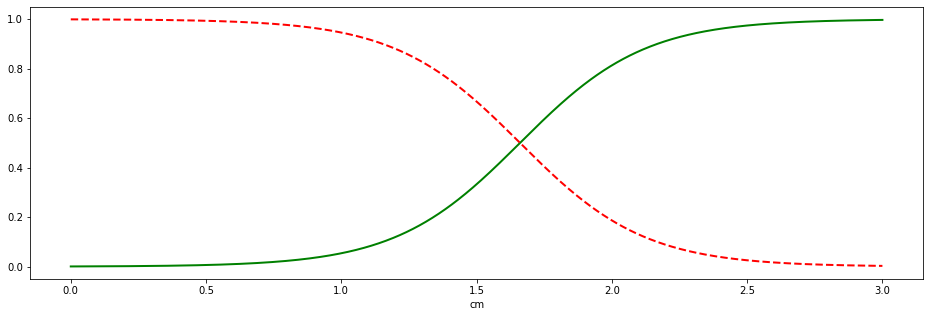

In [52]:
# 꽃잎의 너비가 0~3cm인 꽃 데이터에 대한 현재 모델의 추정 확률을 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

# 결과 시각화
plt.figure(figsize=(16, 5))
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label='Iris-Versicolour')
plt.plot(X_new, y_proba[:, 0], 'r--', linewidth=2, label='Not Iris-Versicolour')
plt.xlabel('cm')
plt.show()
plt.close()